## Primer Examen 10%
Un vehículo parte del reposo en un punto con una aceleración constante de $a_1$. 10 segundos después pasa por el mismo punto, y en la misma dirección, un segundo vehículo con una rapidez de 10 m/s y con aceleración constante $a_2$. Calcule el punto de encuentro: 
1. Gráficamente 
1. Encontrando las raíces del polinomio generado a partir de igualar las dos ecuaciones de movimiento.
1. Grafique el polinomio generado

_Ayuda:_
La ecuación de movimiento para el movimiento uniformemente acelerado es:
\begin{align}
x=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2\,,
\end{align}
donde
* $x_0$ es la posición inicial
* $v_0$ es la rapidez inicial
* $t_0$ es el tiempo inicial

Ejecute la siguiente celda para fijar los valores de las aceleraciones en su caso

In [3]:
%pylab inline
import numpy as np
a1=np.random.choice([2,3,4])
a2=a1+4
print('a1={} m/s² and a2={} m/s²'.format(a1,a2))

Populating the interactive namespace from numpy and matplotlib
a1=3 m/s² and a2=7 m/s²


In [4]:
from scipy import optimize

Se definen las ecuaciones de movimiento para cada vehiculo, teniendo en cuenta los valores de aceleracion, velocidad y timepo para cada caso

In [5]:
t=np.linspace(0,30,50)
t2=np.linspace(10,30,50)
a1=3. #aceleracion vehiculo 1
a2=7. #aceleracion vehiculo 2
x0=0. #posicion inicial vehiculo 1 y del vehiculo 2 despues de 10s. Este corresponde al origen del sistema de coordenadas
v0=10. #velocidad inicial del vehiculo 2
t0=10. #tiempo inicial vehiculo 2

#Ecuacion de movimiento vehiculo 1
def x1(t):
    return x0+0.5*a1*t**2

#Ecuacion de movimiento vehiculo 2
def x2(t):
    return x0+v0*(t-t0)+0.5*a2*(t-t0)**2


## 1. Graficamente

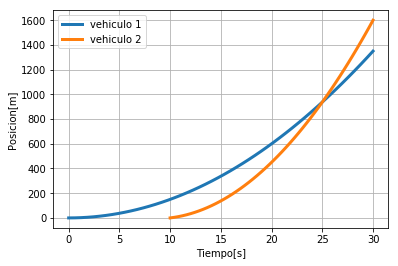

In [6]:
plt.plot(t,x1(t), linewidth=3, label="vehiculo 1")
plt.plot(t2,x2(t2), linewidth=3, label="vehiculo 2")
plt.legend()
plt.xlabel("Tiempo[s]")
plt.ylabel("Posicion[m]")
plt.grid()

De esta manera, graficamente el punto de encuentro se dara aproximadamente pasados 25 segundos y ambos tendran una posicion aproximada de 1km 

## 2. Raices del polinomio

Se define el polinomio que resulta de igualar las dos ecuaciones de movimiento antes descritas

In [7]:
def X(t):
    return x1(t)-x2(t)
tcomun=optimize.newton(X,20.) #Encuentra la raiz utilizando el metodo de Newton 

In [8]:
print('El tiempo al que estaran en la misma posicion es t={} s'.format(tcomun))
print('Los vehiculos se encuentran en x={} m'.format(x1(tcomun)))

El tiempo al que estaran en la misma posicion es t=25.000000000000004 s
Los vehiculos se encuentran en x=937.5000000000003 m


Evalua el tiempo encontrado en cada ecuacion de movimiento y verifica que en ese tiempo, ambos vehiculos tienen la misma posicion:

In [9]:
x1(tcomun),x2(tcomun) 

(937.5000000000003, 937.5000000000005)

## 3. Grafica del polinomio

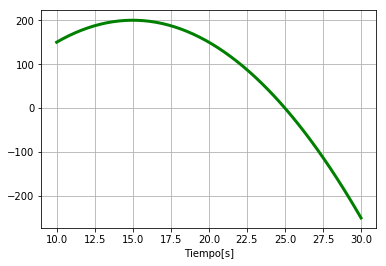

In [10]:
tc=np.linspace(10,30,50)
plt.plot(tc,X(tc), linewidth=3, color="green")
plt.xlabel("Tiempo[s]")
plt.grid()

Se grafica el polinomio resultante y se verifica que su raiz esta en 25